<a href="https://colab.research.google.com/github/Abhiram-108/CSE-LAB-303/blob/main/PCA_for_Feature_Reduction_in_a_Classification_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np




In [2]:
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [6]:
y_pred = log_reg.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, y_pred)
baseline_precision = precision_score(y_test, y_pred, average='macro')
baseline_recall = recall_score(y_test, y_pred, average='macro')

In [7]:
baseline_performance = {
    "Accuracy": baseline_accuracy,
    "Precision": baseline_precision,
    "Recall": baseline_recall
}

baseline_performance

{'Accuracy': 0.9814814814814815,
 'Precision': 0.9777777777777779,
 'Recall': 0.9841269841269842}

# PART--**2**

In [8]:
component_numbers = [2, 5, 10]
performance_metrics = {
    "Components": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": []
}



In [9]:
for n_components in component_numbers:
    # Apply PCA on the training data
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train the logistic regression model on PCA-reduced data
    log_reg_pca = LogisticRegression(max_iter=10000)
    log_reg_pca.fit(X_train_pca, y_train)

    # Predict and evaluate
    y_pred_pca = log_reg_pca.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    precision_pca = precision_score(y_test, y_pred_pca, average='macro')
    recall_pca = recall_score(y_test, y_pred_pca, average='macro')

    # Store the results
    performance_metrics["Components"].append(n_components)
    performance_metrics["Accuracy"].append(accuracy_pca)
    performance_metrics["Precision"].append(precision_pca)
    performance_metrics["Recall"].append(recall_pca)

In [10]:
performance_metrics

{'Components': [2, 5, 10],
 'Accuracy': [0.9629629629629629, 0.9814814814814815, 0.9814814814814815],
 'Precision': [0.9710144927536232, 0.9833333333333334, 0.9777777777777779],
 'Recall': [0.9649122807017544, 0.9761904761904763, 0.9841269841269842]}

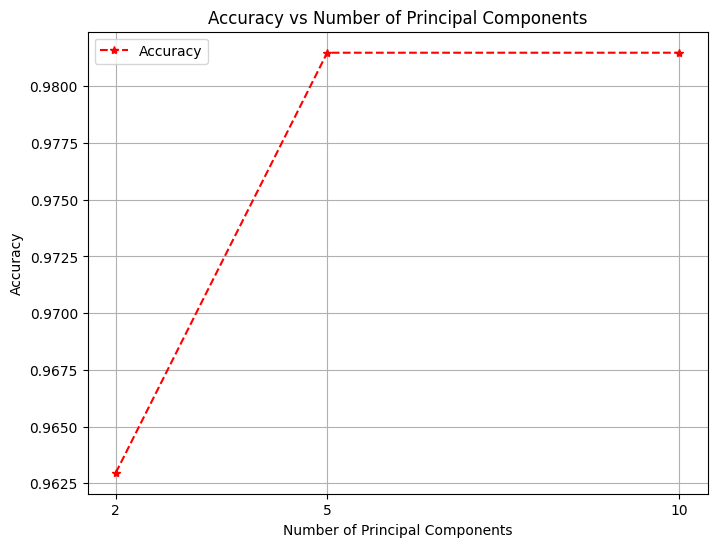

In [16]:
import matplotlib.pyplot as plt


component_numbers = [2, 5, 10]
accuracy_values = performance_metrics["Accuracy"]

# Plotting the accuracy vs number of components
plt.figure(figsize=(8, 6))
plt.plot(component_numbers, accuracy_values, marker='*', linestyle='--', color='r', label='Accuracy')

plt.title('Accuracy vs Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.xticks(component_numbers)
plt.grid(True)
plt.legend()
plt.show()